<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_2_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,53.828269,97.675712,28.612476,53.319509,-0.001683,243.434283,243.431008,0.003274
1,0.0,1.0,26.505350,72.775129,64.715117,21.789904,0.008049,195.793550,195.783765,0.009785
2,0.0,2.0,38.510866,20.517617,72.555865,50.355564,0.025967,191.965880,191.946886,0.018994
3,0.0,3.0,58.787577,41.176799,95.862169,28.579330,0.001619,234.407494,234.409916,-0.002422
4,0.0,4.0,41.790841,51.808352,70.999396,62.488652,-0.003512,237.083728,237.090014,-0.006286
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,85.046239,92.977769,47.873956,34.223977,-0.002964,270.118976,270.119817,-0.000840
19996,999.0,16.0,49.290735,21.336979,42.287864,62.291877,-0.004105,185.203349,185.205446,-0.002097
19997,999.0,17.0,95.177446,50.053854,22.267944,45.191064,-0.002023,222.688285,222.686679,0.001606
19998,999.0,18.0,33.155001,70.229599,34.973368,22.095492,-0.001745,170.451714,170.450244,0.001470


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    53.828269  97.675712  28.612476  53.319509 -0.001683  243.434283   
      1.0    26.505350  72.775129  64.715117  21.789904  0.008049  195.793550   
      2.0    38.510866  20.517617  72.555865  50.355564  0.025967  191.965880   
      3.0    58.787577  41.176799  95.862169  28.579330  0.001619  234.407494   
      4.0    41.790841  51.808352  70.999396  62.488652 -0.003512  237.083728   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   85.046239  92.977769  47.873956  34.223977 -0.002964  270.118976   
      16.0   49.290735  21.336979  42.287864  62.291877 -0.004105  185.203349   
      17.0   95.177446  50.053854  22.267944  45.191064 -0.002023  222.688285   
      18.0   33.155001  70.229599  34.973368  22.095492 -0.001745  170.451714   
      19.0   54.453066  40.903471  57.526672  68.830798  0.008528  231.722535   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    243.431008  0.003274  
      1.0    195.783765  0.009785  
      2.0    191.946886  0.018994  
      3.0    234.409916 -0.002422  
      4.0    237.090014 -0.006286  
...                 ...       ...  
999.0 15.0   270.119817 -0.000840  
      16.0   185.205446 -0.002097  
      17.0   222.686679  0.001606  
      18.0   170.450244  0.001470  
      19.0   231.713492  0.009042  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    53.828269  97.675712  28.612476  53.319509 -0.001683  243.434283   
      1.0    26.505350  72.775129  64.715117  21.789904  0.008049  195.793550   
      2.0    38.510866  20.517617  72.555865  50.355564  0.025967  191.965880   
      3.0    58.787577  41.176799  95.862169  28.579330  0.001619  234.407494   
      4.0    41.790841  51.808352  70.999396  62.488652 -0.003512  237.083728   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   85.046239  92.977769  47.873956  34.223977 -0.002964  270.118976   
      16.0   49.290735  21.336979  42.287864  62.291877 -0.004105  185.203349   
      17.0   95.177446  50.053854  22.267944  45.191064 -0.002023  222.688285   
      18.0   33.155001  70.229599  34.973368  22.095492 -0.001745  170.451714   
      19.0   54.453066  40.903471  57.526672  68.830798  0.008528  231.722535   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    243.431008  0.003274  
      1.0    195.783765  0.009785  
      2.0    191.946886  0.018994  
      3.0    234.409916 -0.002422  
      4.0    237.090014 -0.006286  
...                 ...       ...  
999.0 15.0   270.119817 -0.000840  
      16.0   185.205446 -0.002097  
      17.0   222.686679  0.001606  
      18.0   170.450244  0.001470  
      19.0   231.713492  0.009042  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,53.828269,97.675712,28.612476,53.319509,-0.001683,243.434283,243.431008,0.003274
1,0.0,1.0,26.505350,72.775129,64.715117,21.789904,0.008049,195.793550,195.783765,0.009785
2,0.0,2.0,38.510866,20.517617,72.555865,50.355564,0.025967,191.965880,191.946886,0.018994
3,0.0,3.0,58.787577,41.176799,95.862169,28.579330,0.001619,234.407494,234.409916,-0.002422
4,0.0,4.0,41.790841,51.808352,70.999396,62.488652,-0.003512,237.083728,237.090014,-0.006286
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,85.046239,92.977769,47.873956,34.223977,-0.002964,270.118976,270.119817,-0.000840
19996,999.0,16.0,49.290735,21.336979,42.287864,62.291877,-0.004105,185.203349,185.205446,-0.002097
19997,999.0,17.0,95.177446,50.053854,22.267944,45.191064,-0.002023,222.688285,222.686679,0.001606
19998,999.0,18.0,33.155001,70.229599,34.973368,22.095492,-0.001745,170.451714,170.450244,0.001470


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    53.828269  97.675712  28.612476  53.319509 -0.001683  243.434283   
      1.0    26.505350  72.775129  64.715117  21.789904  0.008049  195.793550   
      2.0    38.510866  20.517617  72.555865  50.355564  0.025967  191.965880   
      3.0    58.787577  41.176799  95.862169  28.579330  0.001619  234.407494   
      4.0    41.790841  51.808352  70.999396  62.488652 -0.003512  237.083728   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   85.046239  92.977769  47.873956  34.223977 -0.002964  270.118976   
      16.0   49.290735  21.336979  42.287864  62.291877 -0.004105  185.203349   
      17.0   95.177446  50.053854  22.267944  45.191064 -0.002023  222.688285   
      18.0   33.155001  70.229599  34.973368  22.095492 -0.001745  170.451714   
      19.0   54.453066  40.903471  57.526672  68.830798  0.008528  231.722535   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    243.431008  0.003274  
      1.0    195.783765  0.009785  
      2.0    191.946886  0.018994  
      3.0    234.409916 -0.002422  
      4.0    237.090014 -0.006286  
...                 ...       ...  
999.0 15.0   270.119817 -0.000840  
      16.0   185.205446 -0.002097  
      17.0   222.686679  0.001606  
      18.0   170.450244  0.001470  
      19.0   231.713492  0.009042  

[20000 rows x 8 columns]

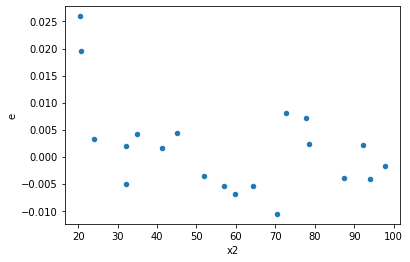

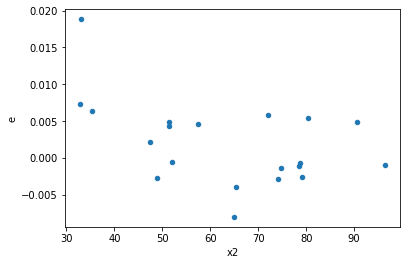

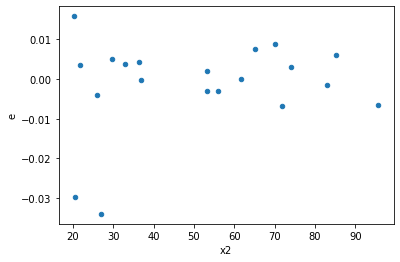

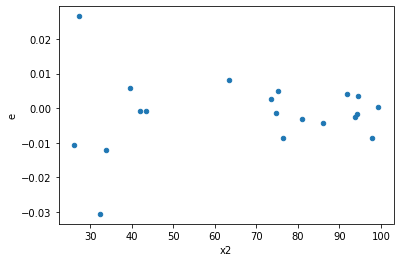

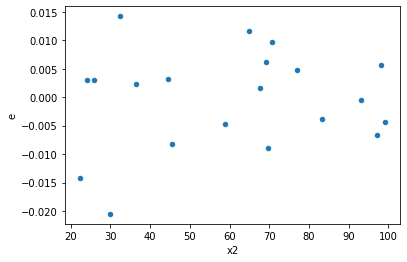

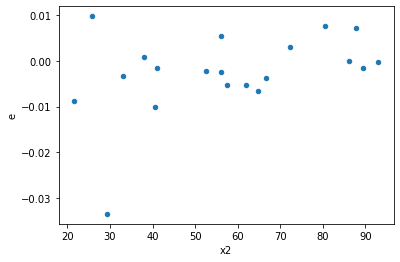

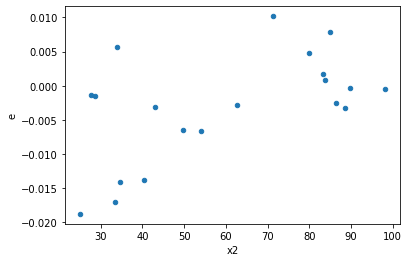

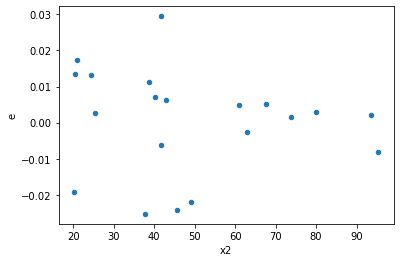

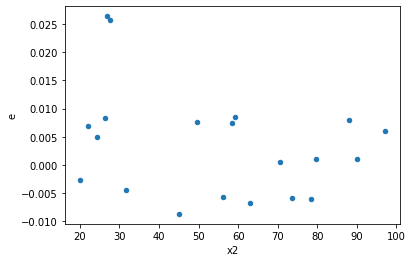

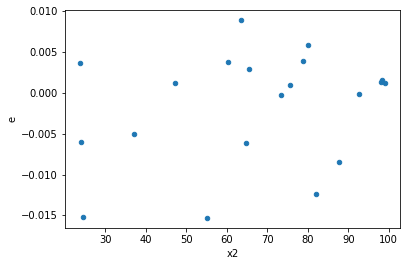

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,2.0,10.0,8.852312847094643e-06,0.0018137029809593079,4.4261564235473214e-06,0.00018137029809593079,40.976929132245274,3.0421471253427868e-05,0.9999847892643733,1.5210735626713934e-05,Reject001=0 : Heteroscedasticity
5.0,8.0,4.0,0.0001271394073245767,0.0009383351732908806,1.5892425915572088e-05,0.00023458379332272014,14.7607290774195,0.020096806670369505,0.9899515966648152,0.010048403335184752,Reject001=1 : Homoscedasticity
7.0,1.0,11.0,1.9128551665288765e-24,0.0013677782994985465,1.9128551665288765e-24,0.00012434348177259514,6.50041278338038e+19,0.0,1.0,0.0,Reject001=0 : Heteroscedasticity
9.0,9.0,3.0,0.00031074788860118514,0.00015643479957354103,3.452754317790946e-05,5.2144933191180344e-05,1.5102416329622432,0.8083213235604116,0.5958393382197942,0.4041606617802058,Reject001=1 : Homoscedasticity
10.0,4.0,8.0,0.00014649012839755186,0.00030029903870895273,3.6622532099387964e-05,3.753737983861909e-05,1.0249804611201752,0.900152357139242,0.549923821430379,0.450076178569621,Reject001=1 : Homoscedasticity
13.0,8.0,4.0,0.00018475827138602664,0.0011661071986420475,2.309478392325333e-05,0.00029152679966051187,12.623058116901614,0.026883706385567807,0.9865581468072161,0.013441853192783904,Reject001=1 : Homoscedasticity
15.0,1.0,11.0,3.7966297646476856e-26,0.001208104755924057,3.7966297646476856e-26,0.00010982770508400518,2.892768373325884e+21,0.0,1.0,0.0,Reject001=0 : Heteroscedasticity
16.0,7.0,5.0,0.0007035147478791392,0.0007246524511501533,0.00010050210683987703,0.00014493049023003065,1.4420641993201024,0.710044152843432,0.644977923578284,0.355022076421716,Reject001=1 : Homoscedasticity
17.0,5.0,7.0,7.257363276905525e-05,0.000913823182557931,1.451472655381105e-05,0.00013054616893684728,8.994049488487986,0.011793865746013488,0.9941030671269933,0.005896932873006744,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,13.0,1.0,0.0009740861816147711,4.52364397489937e-26,7.492970627805931e-05,4.52364397489937e-26,6.037183647981241e-22,8.988972442237461e-132,Reject001=0 : Heteroscedasticity
1.0,6.0,6.0,0.00014246957094041443,2.5181366395920834e-05,2.3744928490069072e-05,4.196894399320139e-06,0.1767490856447692,0.053420179770894555,Reject001=1 : Homoscedasticity
2.0,11.0,1.0,0.0013764897945323304,9.22500253452693e-24,0.00012513543586657549,9.22500253452693e-24,7.372014546193777e-20,1.4852536449734984e-100,Reject001=0 : Heteroscedasticity
3.0,2.0,10.0,8.852312847094643e-06,0.0018137029809593079,4.4261564235473214e-06,0.00018137029809593079,40.976929132245274,3.0421471253427868e-05,Reject001=0 : Heteroscedasticity
4.0,6.0,6.0,7.786273092101449e-05,6.265409140901016e-05,1.2977121820169081e-05,1.044234856816836e-05,0.8046736952055756,0.7986413364002369,Reject001=1 : Homoscedasticity
5.0,8.0,4.0,0.0001271394073245767,0.0009383351732908806,1.5892425915572088e-05,0.00023458379332272014,14.7607290774195,0.020096806670369505,Reject001=1 : Homoscedasticity
6.0,3.0,9.0,0.00028322024796260514,0.0002457459039910219,9.440674932086838e-05,2.7305100443446878e-05,0.28922826640966814,0.33565126972373466,Reject001=1 : Homoscedasticity
7.0,1.0,11.0,1.9128551665288765e-24,0.0013677782994985465,1.9128551665288765e-24,0.00012434348177259514,6.50041278338038e+19,0.0,Reject001=0 : Heteroscedasticity
8.0,8.0,4.0,0.0007447169675368625,0.0002548083949660096,9.30896209421078e-05,6.37020987415024e-05,0.6843093579800756,0.5994174203779505,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      719
Reject001=0 : Heteroscedasticity    281
Name: Result_test, dtype: int64